# WEB PROGRAMMING USING PYTHON
- [Socket](https://www.cs.dartmouth.edu/~campbell/cs60/socketprogramming.html)
- API
- BeautifulSoup

## Socket
- **TCP** (Transmission Control Protocol)
- **UDP** (User Datagram Protocol)

### TCP

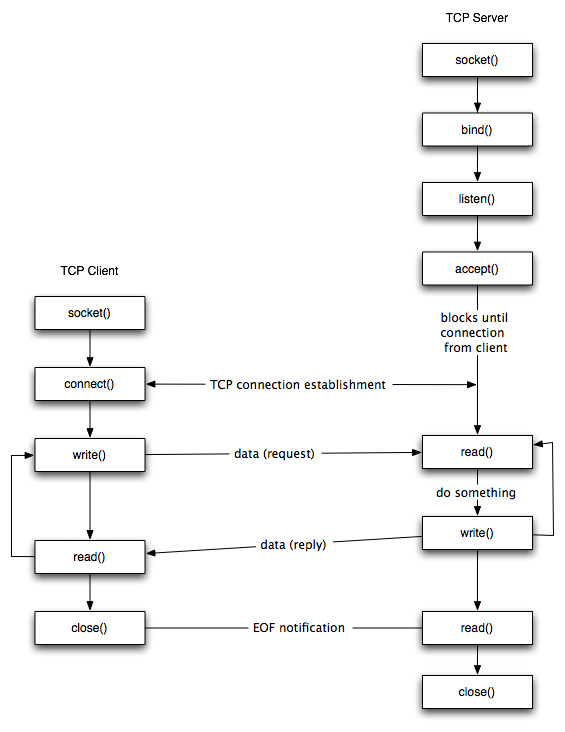

#### tcp_client.py
```python
import socket
host = socket.gethostname() #as both run on same computer
port = 5000
client_socket = socket.socket()
client_socket.connect((host, port))
msg = input("client: ")
while msg.lower().strip() != "bye":
    client_socket.send(msg.encode())
    print("server:", client_socket.recv(1024).decode())
    msg = input("client: ")
client_socket.close()
```

#### tcp_server.py
```python
import socket
host = socket.gethostname() #as both run on same computer
port = 5000
server_socket = socket.socket()
server_socket.bind((host, port))
server_socket.listen()
conn, address = server_socket.accept()
print("Connection from", str(address))
while True: 
    data = conn.recv(1024).decode()
    if not data: break
    print("client:", data)
    msg = input("server: ")
    conn.send(msg.encode())
conn.close()
```

### UDP

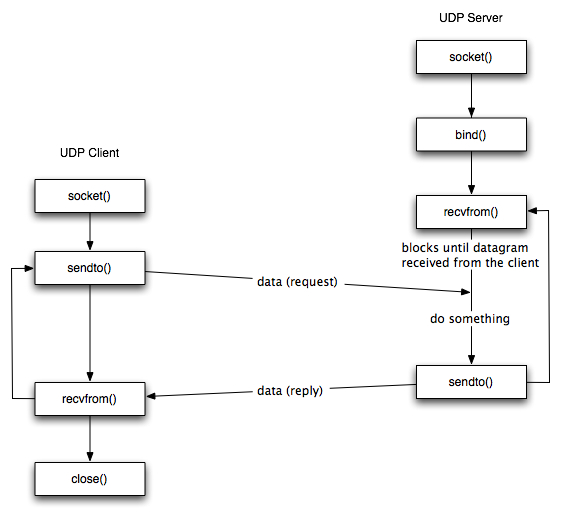

#### udp_client.py
```python
import socket
host=socket.gethostname()
port=8000
ADDR=host, port
client=socket.socket(type=socket.SOCK_DGRAM)
while True:
    msg=input('client --> ')
    client.sendto(msg.encode(), ADDR)
    if not msg: break
    rep, ADDR=client.recvfrom(1024)
    rep=rep.decode()
    if not rep: break
    print(f'server({ADDR}) --> {rep}')
client.close()
```

#### udp_server.py
```python
import socket
host=socket.gethostname()
port=8000
ADDR=host, port
server=socket.socket(type=socket.SOCK_DGRAM)
server.bind(ADDR)
while True:
    rep, addr=server.recvfrom(1024)
    if not rep: break
    print(f'client({addr}) --> {rep.decode()}')
    msg=input('server --> ')
    server.sendto(msg.encode(), addr)
    if not msg: break
server.close()
```

### Simple Web Browser

In [1]:
import socket
my_socket=socket.socket()
my_socket.connect(("gtu.ac.in", 80))
command='GET  https://gtu.ac.in/Circular_Acedemics.aspx HTTP/1.0\r\n\r\n'
my_socket.send(command.encode())
while True:
    res=my_socket.recv(1024).decode()
    if not res: break
    print(res)
my_socket.close()

HTTP/1.1 200 OK
Date: Tue, 16 Jul 2024 08:00:23 GMT
Content-Type: text/html; charset=utf-8
Content-Length: 140603
Connection: close
Cache-Control: private
Server: Microsoft-IIS/10.0
Set-Cookie: ASP.NET_SessionId=0yacmlehsmu4x23orbiydyp5; path=/; HttpOnly
X-Content-Type-Options: nosniff
X-XSS-Protection: 1; mode=block




<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>
	Gujarat Technological University
</title>

    <!-- Meta line commented & added by Vishwa - 05/09/2022-->
    
    <meta charset="utf-8" name="viewport" content="width=device-width, initial-scale=1.0" />
    <!-- Responsive css -->
<link rel="stylesheet" href="assets/css/responsive.css" /><link rel="shortcut icon" type="image/x-icon" href="assets/img/favicon.ico" /><link rel="stylesheet" href="assets/css/odometer-theme-default.css" /><link rel="stylesheet" type="text/css" href="assets/vendor

### HTTP Server

In [2]:
import socket

In [3]:
def createserver():
    server=socket.socket()
    server.bind(('localhost', 4500))
    server.listen()
    while True:
        client, addr = server.accept()
        rec=client.recv(5000).decode()
        print(rec)
        data='HTTP/1.1 200 Ok\r\n'
        data+='Content-Type: text/html; charset=utf-8\r\n'
        data+='\r\n'
        data+=f'<html><body>{addr}</body></html>\r\n\r\n'
        client.send(data.encode())
    server.close()

```
GET / HTTP/1.1
Host: localhost:4500
Connection: keep-alive
sec-ch-ua: "Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"
sec-ch-ua-mobile: ?0
sec-ch-ua-platform: "Windows"
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
Sec-Fetch-Site: none
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Sec-Fetch-Dest: document
Accept-Encoding: gzip, deflate, br, zstd
Accept-Language: en-US,en;q=0.9
Cookie: username-localhost-8888="2|1:0|10:1720505008|23:username-localhost-8888|196:eyJ1c2VybmFtZSI6ICI5MjlmZjVmMjA4YmU0ODZlOWJiOGQ3ZTdkOWM2YWJkNyIsICJuYW1lIjogIkFub255bW91cyBTcG9uZGUiLCAiZGlzcGxheV9uYW1lIjogIkFub255bW91cyBTcG9uZGUiLCAiaW5pdGlhbHMiOiAiQVMiLCAiY29sb3IiOiBudWxsfQ==|d46b389dbaeaaa43d3c7b4ee42d31f514e589cc37d089e1c0e17ff0d731fbde6"; _xsrf=2|cb85b27a|72b794fadf704f18df8e67ae9213255c|1720505008
```255c|1720505008

In [4]:
# createserver()

## API

In [5]:
from dotenv import load_dotenv
import os
import requests
import pandas as pd
load_dotenv()  # take environment variables from .env.

True

In [6]:
def print_json(data):
    print(json.dumps(data, indent=2))

### [Geocoding API](https://openweathermap.org/api/geocoding-api)


In [7]:
def get_coor(city_name):
    url = f'http://api.openweathermap.org/geo/1.0/direct?q={city_name}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    coor= res.json()
    lat, lon = coor[0]['lat'], coor[0]['lon']
    return (lat, lon)

In [8]:
print(get_coor('Ahmedabad'))

(23.0216238, 72.5797068)


### [Current weather data](https://openweathermap.org/current)

In [9]:
def get_current_weather_data(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return ''
    url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    data = res.json()
    return {
        'temp': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'visibiltiy': data['visibility'],
        'description': data['weather'][0]['description'],
        'wind speed': data['wind']['speed'],
        'pressure': data['main']['pressure'],
        'country': data['sys']['country']
    }

In [10]:
print_json(get_current_weather_data('Delhi'))

{
  "temp": 308.21,
  "humidity": 59,
  "visibiltiy": 3500,
  "description": "haze",
  "wind speed": 4.12,
  "pressure": 999,
  "country": "IN"
}


### [Air Pollution API](https://openweathermap.org/api/air-pollution)


In [11]:
def get_air_pollution(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return ''
    url = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code
    aqi = res.json()['list'][0]['main']['aqi']
    return ['Good', 'Fair', 'Moderate', 'Poor', 'Very Poor'][aqi-1]

In [12]:
get_air_pollution('Bombay')

'Good'

### [Call 5 day / 3 hour forecast data](https://openweathermap.org/forecast5)


In [13]:
def day5_hour3_weather_forecast(city_name):
    try:
        lat, lon = get_coor(city_name)
    except Error as e:
        return
    url = f'http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={os.getenv("OWM_API")}'
    res = requests.get(url)
    if res.status_code != 200:
        raise res.status_code 
    list = res.json()['list']
    sea_level, date_time, temp, pressure, humidity, description, wind_speed = [], [], [], [], [], [], []
    
    for data in list:
        sea_level.append(data['main']['sea_level'])
        date_time.append(data['dt_txt'])
        temp.append(data['main']['temp'])
        pressure.append(data['main']['pressure'])
        humidity.append(data['main']['humidity'])
        description.append(data['weather'][0]['description'])
        wind_speed.append(data['wind']['speed'])
    
    return pd.DataFrame({
        'sea_level': sea_level, 
        'date_time': date_time,
        'temp': temp,
        'pressure': pressure,
        'humidity': humidity,
        'description': description,
        'wind_speed': wind_speed
    })

In [14]:
day5_hour3_weather_forecast('bombay')

,sea_level,date_time,temp,pressure,humidity,description,wind_speed
0,1000,2024-07-16 09:00:00,301.18,1000,78,light rain,4.87
1,1000,2024-07-16 12:00:00,300.92,1000,81,moderate rain,4.59
2,1001,2024-07-16 15:00:00,300.32,1001,86,moderate rain,7.01
3,1002,2024-07-16 18:00:00,299.41,1002,91,moderate rain,7.90
4,1000,2024-07-16 21:00:00,299.40,1000,90,moderate rain,7.12
5,1001,2024-07-17 00:00:00,299.84,1001,89,moderate rain,6.60
6,1003,2024-07-17 03:00:00,300.30,1003,87,moderate rain,6.60
7,1003,2024-07-17 06:00:00,300.44,1003,87,moderate rain,7.53
8,1002,2024-07-17 09:00:00,300.22,1002,88,moderate rain,8.95
9,1002,2024-07-17 12:00:00,300.68,1002,85,moderate rain,8.65


### Task Ahmedabad VS Bombay Temp difference

In [15]:
ahmedabad = day5_hour3_weather_forecast('ahmedabad')
bombay = day5_hour3_weather_forecast('bombay')
df=pd.DataFrame({
    "date_time": ahmedabad['date_time'],
    'ahmedabad_temp': ahmedabad['temp'],
    'bombay_temp': bombay['temp'],
})

df['temp_diff'] = df['ahmedabad_temp'] - df['bombay_temp']

df

,date_time,ahmedabad_temp,bombay_temp,temp_diff
0,2024-07-16 09:00:00,304.19,301.18,3.01
1,2024-07-16 12:00:00,305.50,300.92,4.58
2,2024-07-16 15:00:00,303.34,300.32,3.02
3,2024-07-16 18:00:00,301.50,299.41,2.09
4,2024-07-16 21:00:00,302.36,299.40,2.96
5,2024-07-17 00:00:00,301.34,299.84,1.50
6,2024-07-17 03:00:00,301.87,300.30,1.57
7,2024-07-17 06:00:00,303.55,300.44,3.11
8,2024-07-17 09:00:00,305.95,300.22,5.73
9,2024-07-17 12:00:00,306.36,300.68,5.68


## BeautifulSoup

In [16]:
import requests
from bs4 import BeautifulSoup

In [17]:
url = f'https://subslikescript.com/movie/Titanic-120338'

In [18]:
response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    # print(soup.prettify())
    title=soup.find('h1').text.strip()
    # print(title)
    plot = soup.find('p', class_='plot').text.strip()
    # print(plot)
    full_script = soup.find('div', class_='full-script').text.strip()
    # print(full_script)
    article =  soup.find('article', class_='main-article').text.strip()
    # print(article)
    with open(f'{title}.txt', 'w', encoding='utf-8') as file:
        file.write(full_script)
else:
    print(f'Failed to fetch URL: {url}')

In [19]:
res = requests.get('https://subslikescript.com/movies')
soup = BeautifulSoup(res.content, 'html.parser')
li_list = soup.find('ul', class_='scripts-list').find_all('li')
movies = [li.text.strip() for li in li_list]    
print(movies)

['Rawhead Rex (1986)', 'Guddu Rangeela (2015)', 'Vantage Point (2008)', 'Husband, Wife and Their Lover (2022)', 'Secure the Bag (2019)', 'Time Out (2019)', 'Color My World with Love (2022)', 'Narco Valley (2018)', 'The Turnaround (2017)', 'Fogaréu (2022)', 'Victor (2015)', 'Invisible War (2022)', 'Horse Camp (2015)', 'The Hand That Robs the Cradle (2023)', 'Angelique and the King (1966)', 'Merveilleuse Angélique (1965)', 'Love Me Tonight (1932)', 'Interview (2003)', 'Angelique and the Sultan (1968)', 'Untamable Angelique (1967)', 'The Workout Room (2019)', 'Starcrossed (2014)', 'All About Steve (2009)', 'Hudson (2019)', 'In Praise of Love (2001)', 'Grand Knighthawk: Infiltrating the KKK (2023)', '7 Days in Havana (2011)', 'Love You Ram (2023)', 'Clue: A Love Thriller (2021)', 'Dave Hughes: Ridiculous (2023)']


In [20]:
movie_list = []
page=1
while True:
    if len(movie_list) > 500:
        break
    url_page = f'https://subslikescript.com/movies?page={page}'
    res = requests.get(url_page)
    if response.status_code != 200:
        break
    soup = BeautifulSoup(res.content, 'html.parser')
    li_list = soup.find('ul', class_='scripts-list').find_all('li')
    if len(li_list) == 0:
        break
    movie = [li.text.strip() for li in li_list]
    movie_list.extend(movie)
    page+=1
print(movie_list)

['Rawhead Rex (1986)', 'Guddu Rangeela (2015)', 'Vantage Point (2008)', 'Husband, Wife and Their Lover (2022)', 'Secure the Bag (2019)', 'Time Out (2019)', 'Color My World with Love (2022)', 'Narco Valley (2018)', 'The Turnaround (2017)', 'Fogaréu (2022)', 'Victor (2015)', 'Invisible War (2022)', 'Horse Camp (2015)', 'The Hand That Robs the Cradle (2023)', 'Angelique and the King (1966)', 'Merveilleuse Angélique (1965)', 'Love Me Tonight (1932)', 'Interview (2003)', 'Angelique and the Sultan (1968)', 'Untamable Angelique (1967)', 'The Workout Room (2019)', 'Starcrossed (2014)', 'All About Steve (2009)', 'Hudson (2019)', 'In Praise of Love (2001)', 'Grand Knighthawk: Infiltrating the KKK (2023)', '7 Days in Havana (2011)', 'Love You Ram (2023)', 'Clue: A Love Thriller (2021)', 'Dave Hughes: Ridiculous (2023)', 'Snoopy Presents: One-of-a-Kind Marcie (2023)', 'The Lady of Heaven (2021)', 'Legacy of Lies (2020)', 'Elisabeth (2022)', 'Night of the Killer Bears (2022)', 'Chrissy Judy (2022)'

In [ ]:
try:
    res = requests.get('https://subslikescript.com/movies')
    soup = BeautifulSoup(res.content, 'html.parser')
    li_list = soup.find('ul', class_='scripts-list').find_all('li')
    a_list = [li.find('a') for li in li_list]
    for a in a_list:
        res_2 = requests.get(f'https://subslikescript.com{a['href']}')
        soup_2 = BeautifulSoup(res_2.content, 'html.parser')
        full_script = soup_2.find('div', class_='full-script').text.strip()
        with open(f'movies/{a.text.strip()}.txt', 'w', encoding='utf-8') as file:
            file.write(full_script)
except Exception as e:
    print('e')

In [ ]:
import pandas as pd

In [ ]:
res = requests.get('https://www.politifact.com/factchecks/')
soup = BeautifulSoup(res.content, 'html.parser')
li_list = soup.find('ul', class_='o-listicle__list').find_all('li')
facts = []
for li in li_list: 
    a = li.find('div', class_='m-statement__content').find('a')
    facts.append({
            'statement': a.text.strip(),
            'link': f'https://www.politifact.com{a['href']}',
            'date': li.find('footer').text.strip().split('•')[1],
            'source': li.find('div', class_='m-statement__meta').find('a').text.strip()
    })

pd.DataFrame(facts)